# Projeto 1

Fabio Scala Cattini Maluf ENG2B

Pergunta:
Países com alto IDH, consequentemente apresentarão grandes territórios de áreas urbanas?
Países com baixo IDH, consequentemente apresentarão baixas porcentagem de vacinação de DTP3?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
idh = pd.read_excel("hdi_human_development_index.xlsx")
area = pd.read_excel("agricultural_land_percent_of_land_area.xlsx")
vac = pd.read_excel("dtp3_immunized_percent_of_one_year_olds.xlsx")

In [3]:
idh_index = idh.set_index('geo')
area_index = area.set_index('geo')
vac_index = vac.set_index('geo')
   
IDH = idh_index[[1990, 2000, 2010]]
area_rural = area_index[[1990, 2000, 2010]]
vacinacao = vac_index[[1990, 2000, 2010]]


In [4]:
df = vacinacao.join(area_rural, how='inner', lsuffix='_vac', rsuffix='_area')
data = df.join(IDH, how="inner")
data.to_csv('IDH_AreaRural_Vac', index=True)

In [21]:
data = data.dropna()


In [6]:
faixas = [0, 0.555, 0.699, 0.799, 1]
idh_1990_disc = pd.cut(data[1990], bins = faixas)
idh_2000_disc = pd.cut(data[2000], bins = faixas)
idh_2010_disc = pd.cut(data[2010], bins = faixas )

data['1990_idh'] = idh_1990_disc
data['2000_idh'] = idh_2000_disc
data['2010_idh'] = idh_2010_disc

data['1990_idh'].cat.categories = ('Baixo', 'Médio', 'Alto', 'Muito Alto')
data['2000_idh'].cat.categories = ('Baixo', 'Médio', 'Alto', 'Muito Alto')
data['2010_idh'].cat.categories = ('Baixo', 'Médio', 'Alto', 'Muito Alto')

data

,1990_vac,2000_vac,2010_vac,1990_area,2000_area,2010_area,1990,2000,2010,1990_idh,2000_idh,2010_idh
geo,,,,,,,,,,,,
Afghanistan,25.0,24.0,66.0,58.30,57.80,58.10,0.295,0.340,0.454,Baixo,Baixo,Baixo
Albania,94.0,97.0,99.0,40.90,41.80,43.80,0.635,0.662,0.738,Médio,Médio,Alto
Algeria,89.0,86.0,95.0,16.20,16.80,17.40,0.577,0.644,0.724,Médio,Médio,Alto
Argentina,87.0,83.0,94.0,46.60,47.00,53.90,0.705,0.771,0.816,Alto,Alto,Muito Alto
Australia,95.0,90.0,92.0,60.50,59.30,51.90,0.866,0.899,0.927,Muito Alto,Muito Alto,Muito Alto
Austria,90.0,81.0,83.0,36.60,35.60,33.70,0.794,0.837,0.880,Alto,Muito Alto,Muito Alto
Bahrain,94.0,97.0,99.0,11.60,13.00,11.30,0.745,0.794,0.812,Alto,Alto,Muito Alto
Bangladesh,69.0,83.0,95.0,79.80,72.20,71.00,0.386,0.468,0.545,Baixo,Baixo,Baixo
Barbados,91.0,93.0,86.0,44.20,41.90,34.90,0.714,0.750,0.780,Alto,Alto,Alto


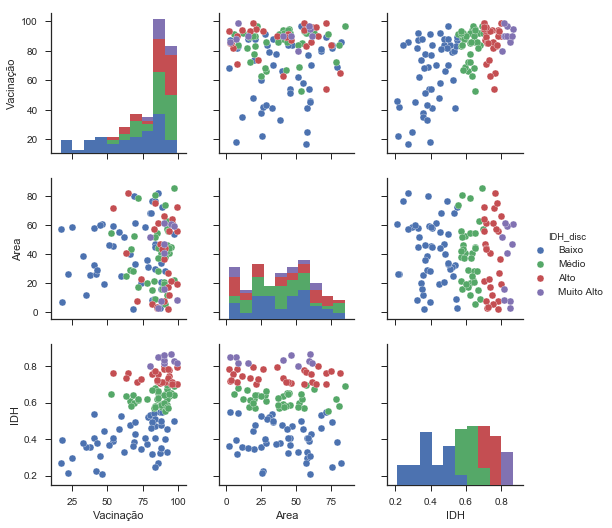

In [23]:
data90 = pd.DataFrame()
data90['Vacinação'] = data['1990_vac'] 
data90['Area'] = data['1990_area']
data90['IDH'] = data[1990]
data90['IDH_disc'] = data['1990_idh']

sns.set(style="ticks")

sns.pairplot(data90,hue= 'IDH_disc')

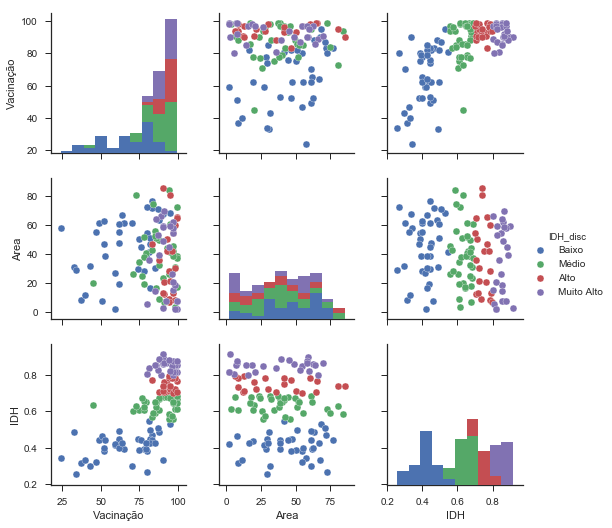

In [19]:
data00 = pd.DataFrame()
data00['Vacinação'] = data['2000_vac'] 
data00['Area'] = data['2000_area']
data00['IDH'] = data[2000]
data00['IDH_disc'] = data['2000_idh']
sns.set(style="ticks")

sns.pairplot(data00,hue= 'IDH_disc')

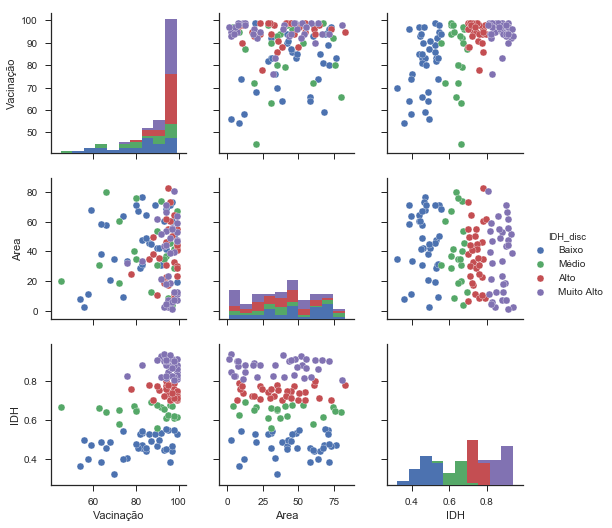

In [20]:
data10 = pd.DataFrame()
data10['Vacinação'] = data['2010_vac'] 
data10['Area'] = data['2010_area']
data10['IDH'] = data[2010]
data10['IDH_disc'] = data['2010_idh']

sns.set(style="ticks")

sns.pairplot(data10,hue= 'IDH_disc')